# Apache Beam - Flatten

`Flatten` takes multiple `PCollection`s that contain the same element types and returns a single `PCollection` with all the elements aggregated together.  While the following diagram shows two PCollections, an arbitrary number can be flattened together.

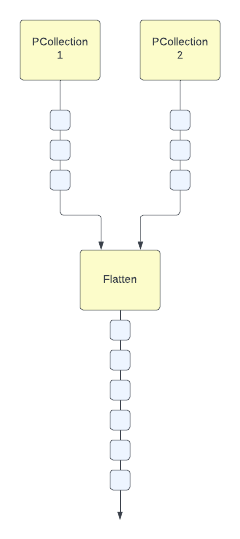


* [JavaDoc: Class Flatten](https://beam.apache.org/releases/javadoc/2.42.0/org/apache/beam/sdk/transforms/Flatten.html)


First, we define the dependencies that we wish to load from the Maven repositories.

In [1]:
%%loadFromPOM

<dependency>
  <groupId>org.apache.beam</groupId>
  <artifactId>beam-sdks-java-core</artifactId>
  <version>2.40.0</version>
</dependency>

<dependency>
  <groupId>org.apache.beam</groupId>
  <artifactId>beam-runners-direct-java</artifactId>
  <version>2.40.0</version>
  <scope>runtime</scope>
</dependency>

<dependency>
  <groupId>org.slf4j</groupId>
  <artifactId>slf4j-api</artifactId>
  <version>2.0.6</version>
</dependency>

Next we define our imports required for execution.

In [7]:
import java.util.Arrays;
import java.util.List;

import org.apache.beam.sdk.Pipeline;
import org.apache.beam.sdk.options.Default;
import org.apache.beam.sdk.options.Description;
import org.apache.beam.sdk.options.PipelineOptionsFactory;
import org.apache.beam.sdk.options.PipelineOptions;
import org.apache.beam.sdk.options.StreamingOptions;
import org.apache.beam.sdk.transforms.Create;
import org.apache.beam.sdk.transforms.GroupByKey;
import org.apache.beam.sdk.values.PCollection;
import org.apache.beam.sdk.transforms.DoFn;
import org.apache.beam.sdk.transforms.ParDo;
import org.apache.beam.sdk.coders.KvCoder;
import org.apache.beam.sdk.coders.StringUtf8Coder;
import org.apache.beam.sdk.values.KV;
import org.apache.beam.sdk.values.PDone;
import org.apache.beam.sdk.values.TupleTag;
import org.apache.beam.sdk.transforms.join.CoGbkResult;
import org.apache.beam.sdk.transforms.join.KeyedPCollectionTuple;
import org.apache.beam.sdk.transforms.join.CoGroupByKey;
import org.apache.beam.sdk.transforms.Combine.CombineFn;
import org.apache.beam.sdk.transforms.Combine;
import org.apache.beam.sdk.transforms.SerializableFunction;
import org.apache.beam.sdk.transforms.Sum;
import org.apache.beam.sdk.transforms.Flatten;
import org.apache.beam.sdk.values.PCollectionList;

String args[] = new String[] {};
var options = PipelineOptionsFactory.fromArgs(args).withValidation().create();

Here is a Flatten that takes three PCollections and flattens them into one:

In [9]:
public class LoggingDoFn<T> extends DoFn<T, T>  {
  @ProcessElement
  public void processElement(
    @Element T element,
    OutputReceiver<T> out) {
    System.out.println(element);
    out.output(element);
  }
}

var pipeline = Pipeline.create(options);
var pc1 = pipeline.apply("Create elements", Create.of(1,2,3));
var pc2 = pipeline.apply("Create elements", Create.of(4,5,6));
var pc3 = pipeline.apply("Create elements", Create.of(7,8));
var pcList = PCollectionList.of(pc1).and(pc2).and(pc3);
pcList
  .apply(Flatten.pCollections())  
  .apply("Print elements", ParDo.of(new LoggingDoFn()));
  
pipeline.run().waitUntilFinish();

5
4
7
1
6
2
3
8


DONE